# Psychophysical Kernel


In [1]:
# First, the libraries to be used will be imported:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# Then, the variables that will not change throughout the simulation will be defined:
sigma_i = 0 # I consider that there is no internal noise
xi_i = 0
tau = 200 #ms
tf = tau/40 #ms

## Perfect Integrator


Optimization terminated successfully.
         Current function value: 0.057896
         Iterations 12


Text(0.5,1,'Psychophysical Kernel Perfect Integrator')

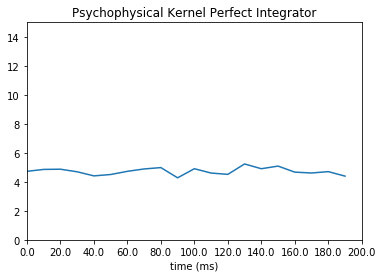

In [3]:
# Defining the values used for this simulation
sigma_s = 0.7
sigma_i = 0.2
mu = 0
step = 0.1
stimulus_values = []
decision_values = []
for z in range(999):
    # The starting decision value will be 0:
    x = 0
    decision_value = []
    iterations = 9
    xi_s = np.random.randn(1)
    stimulus = []
    
    # The process will be repeated a two hundred times (1 second stimulus)
    for i in range(199):
        # Normal random distribution noise:
        iterations += 1
        if iterations == 10:
            xi_s = np.random.randn(1)
            iterations = 0
            if xi_s> 0:
                stimulus.append(xi_s[0])
            else:
                stimulus.append(xi_s[0])
        xi_i = np.random.randn(1)
        # Solved differential diffusion equation:
        x = x - (tf/tau)*(-mu)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
        # All x will be stored in the deccision value list:
        if x> 0:
            decision_value.append(1)
        else:
            decision_value.append(0)
    stimulus_values.append(stimulus)
    decision_values.append(decision_value[len(decision_value)-1])
logit_mod = sm.Logit(decision_values,stimulus_values)
result = logit_mod.fit()
pars =result.params
plt.plot(np.arange(0,len(pars),1),pars)
plt.axis([0,20,0,15])
positions = [20/10*n for n in range(11)]
labels = [round(200/10*n,1) for n in range(11)]
plt.xticks(positions, labels)
plt.xlabel("time (ms)")
plt.title("Psychophysical Kernel Perfect Integrator")

## DDM Absorbing


Optimization terminated successfully.
         Current function value: 0.130315
         Iterations 10


Text(0.5,1,'Psychophysical Kernel Absorbing DDM')

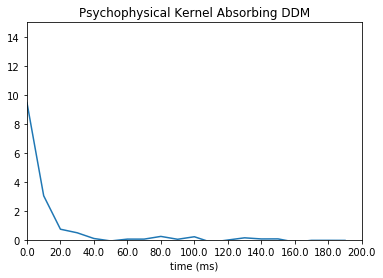

In [8]:
# Defining the values used for this simulation
sigma_s = 0.7
sigma_i  = 0.2
mu = 0
bound = 0.5
decision_values = []
stimulus_values = np.random.randn(1000,20)
for stimulus in stimulus_values:
    # The starting decision value will be 0:
    x = 0
    decision_value = [x]
    # Starting with the condition that the bound hasn't been reached
    reached_bound = False

    # While the bound hasn't been reached, the equation will be performed over time       
    while reached_bound == False:
        # Normal random distribution noise:
        i = 0
        for xi_s in stimulus:
            for i in range(10):
                xi_i = np.random.randn(1)
                # Solved differential diffusion equation:
                x = x - (tf/tau)*(-mu)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
                # When the bound is reached, the rest of the decision value will be the bound value
                if x >= bound:
                    if len(decision_value)<200:
                        reached_bound = True
                        x = bound
                        for i in range(199-len(decision_value)):
                            decision_value.append(x)
                    # When the iterations are over 200, break the loop:
                    else:
                        break
                if x <= (-bound):
                    if len(decision_value)<200:
                        reached_bound = True
                        x = -bound
                        for i in range(200-len(decision_value)):
                            decision_value.append(x)
                    # When the iterations are over 200, break the loop:
                    else:
                        break
                else:
                    # All x before reaching the bound value will be stored in the deccision value list:
                    decision_value.append(x)
                # If the bound hasn't been reached and its over 200 iterations, break the loop
                if len(decision_value)==200:
                    if decision_value[len(decision_value)-1]> 0:
                        decision_values.append(1)
                    else:
                        decision_values.append(0)
                    break

logit_mod = sm.Logit(decision_values,stimulus_values)
result = logit_mod.fit()
pars =result.params
plt.plot(np.arange(0,len(pars),1),pars)
plt.axis([0,20,0,15])
positions = [20/10*n for n in range(11)]
labels = [round(200/10*n,1) for n in range(11)]
plt.xticks(positions, labels)
plt.xlabel("time (ms)")
plt.title("Psychophysical Kernel Absorbing DDM")

## DDM reflecting


Optimization terminated successfully.
         Current function value: 0.138742
         Iterations 10


Text(0.5,1,'Psychophysical Kernel Reflecting DDM')

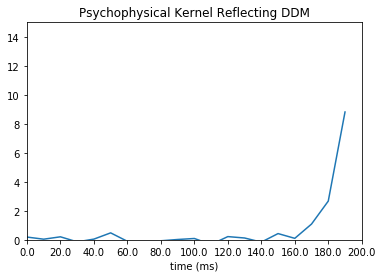

In [8]:
# Defining the values used for this simulation
sigma_s = 0.7
mu = 0
bound = 0.5
sigma_i = 0.2

# Matrix of stimulus values
stimulus_values = np.random.randn(1000,20)
# Vector for the final decision values of each stimulus
decision_values = []

for stimulus_list in stimulus_values:
    # The starting decision value will be 0:
    x = 0
    decision_value = []

    for xi_s in stimulus_list:
        # The process will be repeated 10 times for each xi_s since dt == 5ms
        for y in range(10):
            xi_i = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # If the bound is exceeded, it will return the value of the bound
            if x >= bound:
                x=bound
            elif x <= (-bound):
                x=-bound

            decision_value.append(x)
    # If the last decision value is positive, 1 will be appended to the decision values list.
    if decision_value[len(decision_value)-1] >= 0:
        decision_values.append(1)
    # If it is negative, 0 will be appended.
    else:
        decision_values.append(0)
# Logistic regression is performed in order to obtain the parameters
logit_mod = sm.Logit(decision_values, stimulus_values)
result = logit_mod.fit()
pars = result.params
plt.plot(np.arange(0,len(pars),1),pars)
plt.axis([0,20,0,15])
positions = [20/10*n for n in range(11)]
labels = [round(200/10*n,1) for n in range(11)]
plt.xticks(positions, labels)
plt.xlabel("time (ms)")
plt.title("Psychophysical Kernel Reflecting DDM")